In [2]:
# Chap02-03/twitter_client.py
import os
import sys
from tweepy import API
from tweepy import OAuthHandler
from tweepy import Cursor
import pandas as pd

def get_twitter_auth():
    """Setup Twitter authentication.

    Return: tweepy.OAuthHandler object
    """
    try:
        consumer_key = ""
        consumer_secret = ""
        access_token = ""
        access_secret = ""
    except KeyError:
        sys.stderr.write("TWITTER_* environment variables not set\n")
        sys.exit(1)    
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    return auth

def get_twitter_client():
    """Setup Twitter API client.

    Return: tweepy.API object
    """
    auth = get_twitter_auth()
    client = API(auth)
    return client

In [4]:
myclient=get_twitter_client()

In [5]:
import json
user = "realDonaldTrump"
fname = "user_timeline_{}.jsonl".format(user)
with open(fname, 'w',encoding="utf") as f:
    for page in Cursor(myclient.user_timeline, screen_name=user, count=200).pages(20):
        for status in page:
            f.write(json.dumps(status._json,ensure_ascii=False)+"\n")

In [6]:
import json
inputfile=open("user_timeline_realDonaldTrump.jsonl",encoding="utf-8")
tweets=[]
for line in inputfile:
    tweets.append(json.loads(line))

In [7]:
len(tweets)

3199

### Donald Trump hashtag olarak ne kullanmıs ?

In [11]:
#realDonaldTrump hastagh olarak ne kullanmıs. Önce entity buluyor sonra hashtag bulunuyor.
from collections import defaultdict
from collections import Counter
import json

def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

In [9]:
# burada tüm tweetlerdeki hastaghler alınacak.
hashtags=[]
for tweet in tweets:
    hashtags.extend(get_hashtags(tweet))   #extend cünkü birden fazla hastagh orjinal listeye eklensin.

In [12]:
c=Counter(hashtags)

In [13]:
# en fazla görüntülenen 10 hastagh geldi.
c.most_common(10)  

[('maga', 48),
 ('magarally', 17),
 ('florence', 17),
 ('hurricaneflorence', 10),
 ('jobsnotmobs', 9),
 ('hurricanemichael', 7),
 ('michael', 6),
 ('sotu', 5),
 ('americafirst', 4),
 ('unga', 4)]

### Ne sıklıkla hastagh kullanmıs ?

In [22]:
hashtag_count = defaultdict(int)
for tweet in tweets:
    hashtags_in_tweet = get_hashtags(tweet)
    n_of_hashtags = len(hashtags_in_tweet)
    hashtag_count[n_of_hashtags] += 1

In [23]:
hashtag_count

defaultdict(int, {0: 2991, 1: 179, 2: 24, 3: 5})

In [ ]:
# trump attıgı tweetlerde 2991 tanesinde hiç hastga kullanmmaıs. toplam 179 tweette 1 tane hastag kullanmıs. toplam 24 tweette 2 tane hashtag kullanmıs

In [24]:
tweets_with_hashtags = sum([count for n_of_tags, count in hashtag_count.items() if n_of_tags > 0])

In [25]:
# hashtagli tweet sayısı
tweets_with_hashtags  

208

In [26]:
# hashtagsız tweet sayısı
tweets_no_hashtags = hashtag_count[0]; tweets_no_hashtags   

2991

In [27]:
#toplam tweet sayısı
tweets_total = tweets_no_hashtags + tweets_with_hashtags ; tweets_total   

3199

In [28]:
tweets_with_hashtags_percent = "%.2f" % (tweets_with_hashtags / tweets_total * 100)
tweets_no_hashtags_percent = "%.2f" % (tweets_no_hashtags / tweets_total * 100)
print("{} tweets without hashtags ({}%)".format(tweets_no_hashtags, tweets_no_hashtags_percent))
print("{} tweets with at least one hashtag ({}%)".format(tweets_with_hashtags, tweets_with_hashtags_percent))

2991 tweets without hashtags (93.50%)
208 tweets with at least one hashtag (6.50%)


### Analyzing user mentions

In [29]:
# mention larda peki kimleri kullanmıs realDonaldTrump buna bakıyoruz.

from collections import Counter
import json
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [mention['screen_name'] for mention in mentions]

In [36]:
# Örnegin 30.tweette kimi mentionlamıs
get_mentions(tweets[-30])  

['RichardGrenell', 'realDonaldTrump']

In [37]:
# tüm mentionlar
all_mentiones=[]
for tweet in tweets:
    all_mentiones.extend(get_mentions(tweet))

In [38]:
all_mentiones

['MattBevin',
 'realDonaldTrump',
 'realDonaldTrump',
 'WhiteHouse',
 'foxandfriends',
 'LouDobbs',
 'realDonaldTrump',
 'FoxNews',
 'FoxNews',
 'FoxNews',
 'justinamash',
 'realDonaldTrump',
 'realDonaldTrump',
 'realDonaldTrump',
 'realDonaldTrump',
 'TomFitton',
 'realDonaldTrump',
 'TomFitton',
 'TomFitton',
 'realDonaldTrump',
 'TomFitton',
 'realDonaldTrump',
 'JudicialWatch',
 'FoxNews',
 'callme_Chari',
 'newscomauHQ',
 'FoxNews',
 'foxandfriends',
 'foxandfriends',
 'BilldeBlasio',
 'WhiteHouse',
 'WhiteHouse',
 'realDonaldTrump',
 'realDonaldTrump',
 'WhiteHouse',
 'Trump',
 'PGAChampionship',
 'b_dechambeau',
 'DJohnsonPGA',
 'TrumpFerryPoint',
 'curetivity',
 'EricTrump',
 'realDonaldTrump',
 'EricTrump',
 'AbeShinzo',
 'WhiteHouse',
 'TomCottonAR',
 'SpecialOlympics',
 'NASA',
 'WhiteHouse',
 'GOPChairwoman',
 'realDonaldTrump',
 'GOPChairwoman',
 'RedSox',
 'OANN',
 'foxandfriends',
 'TomFitton',
 'JudicialWatch',
 'GOPChairwoman',
 'realDonaldTrump',
 'GOPChairwoman',
 '

In [39]:
# bir frekans hesabı yapalım
c=Counter(all_mentiones)
c.most_common(10)

[('realDonaldTrump', 234),
 ('WhiteHouse', 100),
 ('dbongino', 64),
 ('FoxNews', 56),
 ('TomFitton', 49),
 ('JudicialWatch', 35),
 ('FLOTUS', 35),
 ('GOPChairwoman', 34),
 ('DonaldJTrumpJr', 25),
 ('foxandfriends', 23)]

### Friends and Followers 

In [40]:
profile=myclient.get_user(screen_name="realDonaldTrump")

In [41]:
followers_number=profile.followers_count;followers_number

60441556

In [43]:
# itunün son 200 follwersi
last_followers=myclient.followers("realDonaldTrump",count=200)  

In [44]:
last_followers[0].screen_name

'zaman_gums'

### Get most frequent words in tweet text

In [63]:
word_all=[]
for tweet in tweets:
    word_all.extend(tweet["text"].split())

In [64]:
word_freq=Counter(word_all)

In [67]:
word_freq.most_common(200)

[('the', 2286),
 ('to', 1356),
 ('of', 1153),
 ('and', 1149),
 ('a', 858),
 ('in', 818),
 ('RT', 782),
 ('is', 780),
 ('for', 587),
 ('I', 464),
 ('on', 448),
 ('are', 429),
 ('that', 406),
 ('with', 385),
 ('our', 351),
 ('The', 345),
 ('will', 336),
 ('be', 319),
 ('have', 297),
 ('has', 262),
 ('was', 262),
 ('at', 254),
 ('you', 245),
 ('great', 227),
 ('by', 225),
 ('President', 218),
 ('-', 185),
 ('we', 179),
 ('&amp;', 177),
 ('not', 177),
 ('it', 175),
 ('Democrats', 170),
 ('very', 164),
 ('who', 161),
 ('people', 159),
 ('as', 158),
 ('all', 155),
 ('Trump', 153),
 ('my', 151),
 ('this', 151),
 ('they', 149),
 ('from', 145),
 ('We', 142),
 ('been', 141),
 ('Thank', 128),
 ('Border', 128),
 ('his', 127),
 ('just', 124),
 ('their', 123),
 ('he', 122),
 ('or', 122),
 ('an', 117),
 ('@realDonaldTrump:', 113),
 ('Great', 109),
 ('than', 108),
 ('out', 107),
 ('now', 96),
 ('about', 92),
 ('This', 92),
 ('but', 89),
 ('being', 89),
 ('get', 88),
 ('United', 88),
 ('It', 87),
 ('mo

##### Removing stop words

In [75]:
import nltk
from nltk.corpus import stopwords
#mention ları bul. (@ ile baslayanlar) sonra bunları bir seriye alalım.
stop_words = set(stopwords.words('english'))

filtered_words = [w for w in word_all if not w in stop_words] 

In [76]:
filtered_words_list=Counter(filtered_words)
filtered_words_list.most_common(20)

[('RT', 782),
 ('I', 464),
 ('The', 345),
 ('great', 227),
 ('President', 218),
 ('-', 185),
 ('&amp;', 177),
 ('Democrats', 170),
 ('people', 159),
 ('Trump', 153),
 ('We', 142),
 ('Thank', 128),
 ('Border', 128),
 ('@realDonaldTrump:', 113),
 ('Great', 109),
 ('This', 92),
 ('get', 88),
 ('United', 88),
 ('It', 87),
 ('many', 80)]

### Time Series Analysis: Plot number tweets per hour

In [77]:
all_dates=[ tweet.get("created_at") for tweet in tweets ]

In [78]:
# tüm tweet date leri.
len(all_dates)

3199

In [79]:
# elimizdeki ilk tweet ne zaman atıldı?
all_dates[0]

'Wed May 22 10:03:51 +0000 2019'

##### tweetleri datetime haline getirip, frekans analizi yapalım

In [80]:
import pandas as pd
dates=pd.to_datetime(all_dates)

In [81]:
dates

DatetimeIndex(['2019-05-22 10:03:51', '2019-05-22 10:02:55',
               '2019-05-22 09:58:59', '2019-05-22 09:55:14',
               '2019-05-22 02:29:40', '2019-05-22 02:20:51',
               '2019-05-22 01:02:38', '2019-05-22 00:51:43',
               '2019-05-22 00:32:40', '2019-05-21 22:48:50',
               ...
               '2018-09-05 23:40:32', '2018-09-05 22:15:09',
               '2018-09-05 21:45:54', '2018-09-05 21:10:01',
               '2018-09-05 19:09:51', '2018-09-05 13:54:35',
               '2018-09-05 13:51:29', '2018-09-05 13:39:54',
               '2018-09-05 13:21:07', '2018-09-05 13:20:22'],
              dtype='datetime64[ns]', length=3199, freq=None)

##### Amacımız saatlik tweet sayısını bulmak

In [82]:
# numpy ile all_dates frame inde her date için 1 degeri atalım frekans analizi için.
#  Püf nokta; satır sayımız kadar 1 yazmalı. Bu nedenle np.ones(len(all_dates)) diyoruz.
import numpy as np
ones = np.ones(len(all_dates))
date_series=pd.Series(ones,index=dates)

In [83]:
date_series.head()

2019-05-22 10:03:51    1.0
2019-05-22 10:02:55    1.0
2019-05-22 09:58:59    1.0
2019-05-22 09:55:14    1.0
2019-05-22 02:29:40    1.0
dtype: float64

##### Saatlik tweet count almak

In [98]:
per_hour = date_series.resample('24H').sum()

In [99]:
per_hour.head()

2018-09-05    10.0
2018-09-06     8.0
2018-09-07     9.0
2018-09-08     9.0
2018-09-09    15.0
Freq: 24H, dtype: float64

##### Plotting

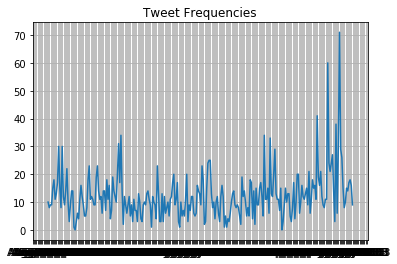

In [100]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title("Tweet Frequencies")

hours = mdates.HourLocator(interval=24)   # 24 saatte bir yazsın tweetleri
date_formatter = mdates.DateFormatter('%b-%d %H')  # ay-gün-saat te yazdıralım.

datemin = per_hour.index[0]   
datemax =  per_hour.index[-1]

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(date_formatter)
ax.plot(per_hour.index, per_hour)
plt.xticks(rotation=0)
plt.show()
